<a href="https://colab.research.google.com/github/isidora-rojas/SIO175_DataAnalysis/blob/main/Module_0/01_python_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting in Python

## Session Overview

1. Importing Libraries and Reading in Data
2. Defining Figures and Axes
3. Line Plots and Customizing
4. Scatter Plots
5. Plotting Uncertainty: Fill between and errorbars
6. Plotting 2-dimensional data: pcolormesh and contourf

## **Importing Libraries and Reading in Data**

``matplotlib`` is the most widely used scientific plotting library in python and the library we will be using for the rest of the lesson. We want to import the submodule called ``matplotlib.pyplot`` with the alias ``plt`` along with our other python libraries:   

In [ ]:
!pip install netCDF4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.7 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset, num2date

Next, we will tell Python to render our plots in directly below our code cells instead of having them pop up in a separate window.

In [ ]:
%matplotlib inline

If you haven't already, let's open the SIO pier temperature and salinity data.

In [ ]:
# Set the filename and path to data
filename = "scripps_pier-2023.nc"

# Open a NetCDF file in read mode
ds = Dataset(filename, mode="r")

# Read in data
time = num2date(ds.variables['time'][:], ds.variables['time'].units, only_use_cftime_datetimes=False)
temp = ds.variables['temperature'][:]
sal = ds.variables['salinity'][:]

FileNotFoundError: [Errno 2] No such file or directory: 'scripps_pier-2023.nc'

-----
**Adanced Note**

We add the argument ``only_use_cftime_datetimes=False`` so that the time variable is a datetime objects that is supported by Matplotlib (i.e., so we can plot with this variable without getting an error). The ``cftime`` datetime objects is the default output of the num2date function and is not understood by Matplotlib. Using this argument converts the time to standard Python ``datetime.datetime objects``, which Matplotlib supports.

-----

## **Defining Figures and Axes**

To begin, let's start with defining our figure and axes by using:  

``` fig, axes = plt.subplots(N, M)```

This creates a figure (a container for plots) and adds a grid of axes (the individual plots) inside the figure. Here, we tell Python to make *N rows and M columns* of axes. For example, make a figure with 2 rows and 2 columns:

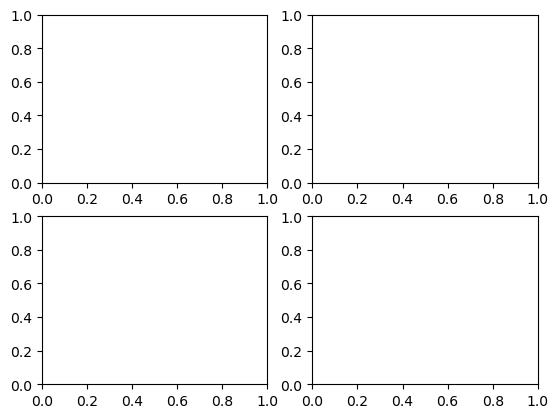

In [ ]:
# Create Figure
fig, axes = plt.subplots(2, 2)

# Display figure
plt.show()

Alternatively, we can give no arguments to the subplot function and Python reverts to its default setting which is a single axis (1x1):

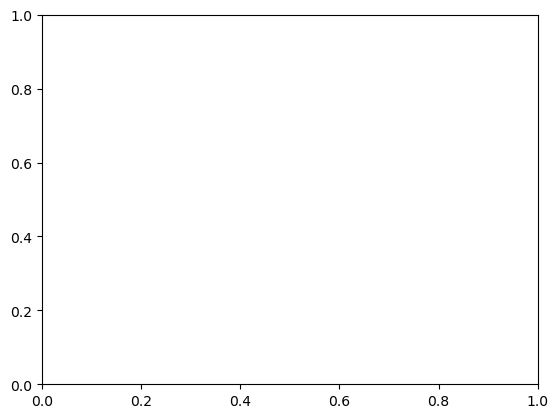

In [ ]:
# Create Figure
fig, axes = plt.subplots()

# Display figure
plt.show()

This is the beauty of this function -- it works the same whether you want to create a single axis or a grid of subplots.
``plt.subplots`` function also outputs two variables:

* ``fig``: The figure object.
* ``axes``: A NumPy array of axes objects.

``fig`` is the variable for the overal figure window while ``axes`` points to single plotting areas created inside that figure. Both objects allow us to modify and plot data on the figure.

## **Line Plots and Customizing**

Let’s start with a single axis and plot the Pier temperature time series using the ``plot`` function

```
axes.plot(x,y)
```

* ``x`` is your horizontal axis data (e.g., time).
* ``y`` is your vertical axis data (e.g., temperature).

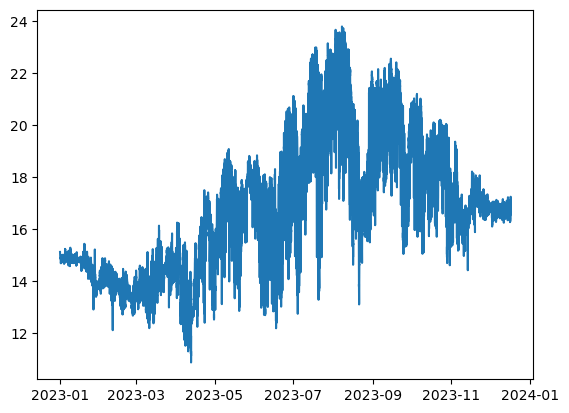

In [ ]:
# Create Figure
fig, axes = plt.subplots()

# Plot temperature
axes.plot(time, temp)

# Display figure
plt.show()

``plt.show()`` tells Matplotlib to display the figure you’ve created. This happens automatically in Jupyter notebooks, but will need to be included in a regular Python script (.py file).

Every figure needs x and y labels on their axes, so let's create the figure again but with axis labels now. Note that the x-axis gives the year and month at each time tick mark.

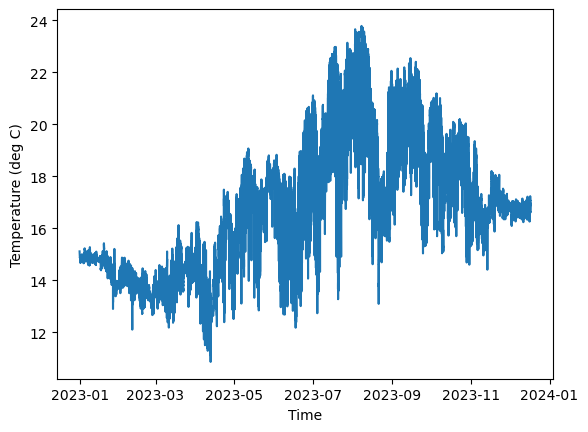

In [ ]:
# Create Figure
fig, axes = plt.subplots(1, 1)

# Plot temperature
axes.plot(time, temp)

# Set axis labels
axes.set_xlabel('Time')
axes.set_ylabel('Temperature (deg C)')

# Display figure
plt.show()

Now, we can make lots of adjustments to this figure to make it a little more asthetically pleasing and readable. Here are a few changes to our line plot:

| Feature     | Parameter         | Example Code                                  | Description                                  |
|-------------|-------------------|-----------------------------------------------|----------------------------------------------|
| Line style  | `linestyle`       | `axes.plot(x, y, linestyle='--')`              | Dashed, dotted, or solid lines (`'-'`, `'--'`, `':'`, `'-.'`) |
| Line width  | `linewidth`       | `axes.plot(x, y, linewidth=2)`                 | Thickness of the line in points              |
| Line color  | `color`           | `axes.plot(x, y, color='red')`                 | Line color using name (`'red'`), hex (`'#FF0000'`), or RGB tuple |

Additionally, we can add a title, set the x and y axes limits and place a grid on the figure.

| Feature      | Parameter / Function   | Example Code                            | Description                              |
|--------------|------------------------|-----------------------------------------|------------------------------------------|
| Grid lines   | `axes.grid()`          | `axes.grid(True)`                       | Adds grid lines to the plot              |
| Title        | `axes.set_title()`     | `axes.set_title("My Plot Title")`       | Sets the title of the plot               |
| X-axis limit | `axes.set_xlim()`      | `axes.set_xlim(0, 100)`                 | Sets the lower and upper limits of the x-axis |
| Y-axis limit | `axes.set_ylim()`      | `axes.set_ylim(10, 25)`                 | Sets the lower and upper limits of the y-axis |

Many more options can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html). Putting this all together.

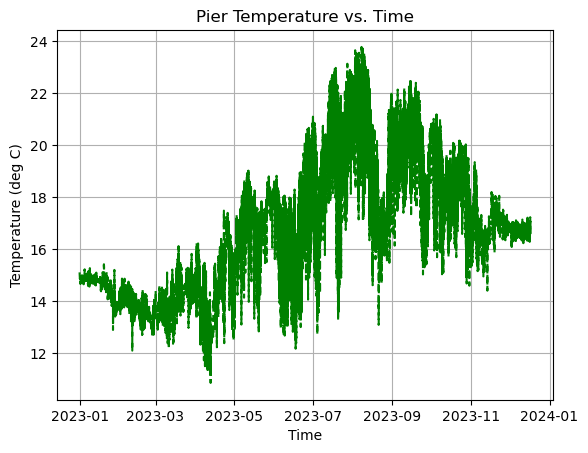

In [ ]:
# Create Figure
fig, axes = plt.subplots(1, 1)

# Plot temperature
axes.plot(time, temp, linestyle='--', linewidth=1.5, color='green')

# Make some adjustments
axes.set_title('Pier Temperature vs. Time')
axes.set_xlabel('Time')
axes.set_ylabel('Temperature (deg C)')
axes.grid(True)

# Display figure
plt.show()

### 🌊  **Activity** 🌊

<u>*Part 1*</u>

Plot the temperature data with the following line plot customizations:
- Line Style: dashed-dotted
- Line Width: 1
- Line Color: yellow

Add grid lines with the following customizations:
- Style: dashed
- Width: 1
- Color: black
- Transparency: 0.75 (Hint: Use the ``alpha`` argument).

Hint: The grid lines take the same arguments as the ``axes.plot`` function.

<u>*Part 2*</u>

Use the ``axes.set_yticks()`` to change the tickmarks on the y axis so the temperature increments by one.

<u>*Part 3*</u>

Change the y label so it renders with latex. To give you a hint, if I wanted to render the temperature in degrees Fahrenheit, I would write:

```axes.set_ylabel(r'Temperature ($^\circ$F)') ```

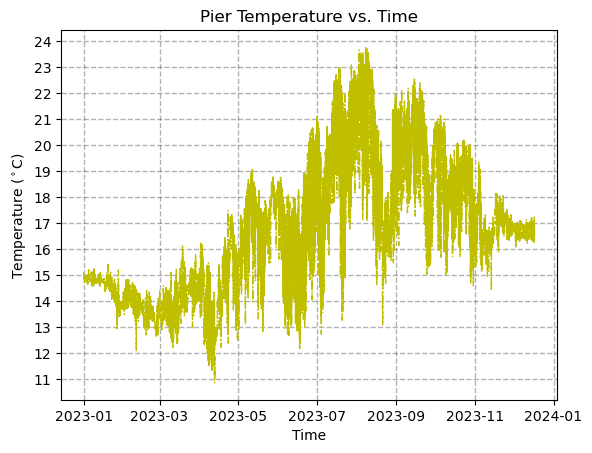

In [ ]:
# Create Figure
fig, axes = plt.subplots(1, 1)

# Plot temperature
axes.plot(time, temp, linestyle='-.', linewidth=1, color='y')

# Make some adjustments
axes.set_title('Pier Temperature vs. Time')
axes.set_xlabel('Time')
axes.set_ylabel(r'Temperature ($^\circ$C)')
axes.set_yticks(np.arange(11,24+1,1))
axes.grid(True,linewidth=1,linestyle='--',color='k',alpha=0.3)

# Display figure
plt.show()

Let's now look at only the first 4 days temperature time series. In order to apply limits to the time axis, we need to import another handy package called ``timedelta`` which is the way Python represents time durations. Here, we will add a 4 day time step to our intial time which we will define as ``t0``.  

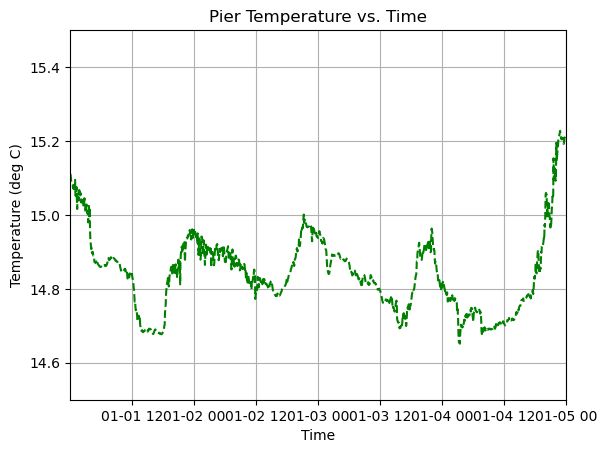

In [ ]:
from datetime import timedelta

# Create Figure
fig, axes = plt.subplots()

# Plot temperature
axes.plot(time, temp, linestyle='--', linewidth=1.5, color='green')

# Make some adjustments
axes.set_title('Pier Temperature vs. Time')
axes.set_xlabel('Time')
axes.set_ylabel('Temperature (deg C)')
axes.set_ylim(14.5,15.5)
axes.grid(True)

# Zoom in on first 4 days
t0 = time[0]
axes.set_xlim(t0, t0 + timedelta(days=4))

# Display figure
plt.show()

There is a problem now though. The x-axis is all squished and its hard to interpret the axis labels. An easy way to fix this is to increase the size of the figure using the ``figsize`` argument within the ``plt.subplots`` function:

```figsize=(width, height)```
* ``width``: width of the figure in inches
* ``height``: height of the figure in inches

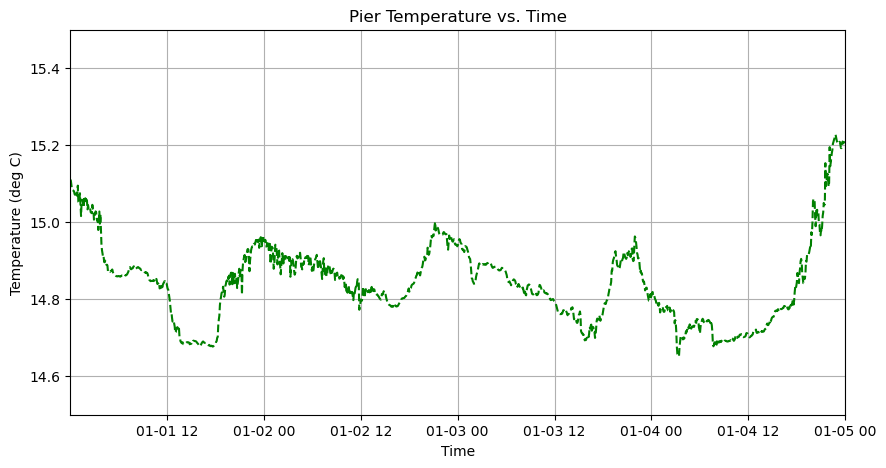

In [ ]:
# Create Figure
fig, axes = plt.subplots(figsize=(10,5))

# Plot temperature
axes.plot(time, temp, linestyle='--', linewidth=1.5, color='green')

# Make some adjustments
axes.set_title('Pier Temperature vs. Time')
axes.set_xlabel('Time')
axes.set_ylabel('Temperature (deg C)')
axes.set_ylim(14.5,15.5)
axes.grid(True)

# Zoom in on first 4 days
t0 = time[0]
axes.set_xlim(t0, t0 + timedelta(days=4))

# Display figure
plt.show()

**What if we want to add another line to the plot?**

We can do this by adding another line of code below the original plot. For example, to plot the mean temperature as a horizontal line, we first compute the mean and then use ``axes.axhline``:

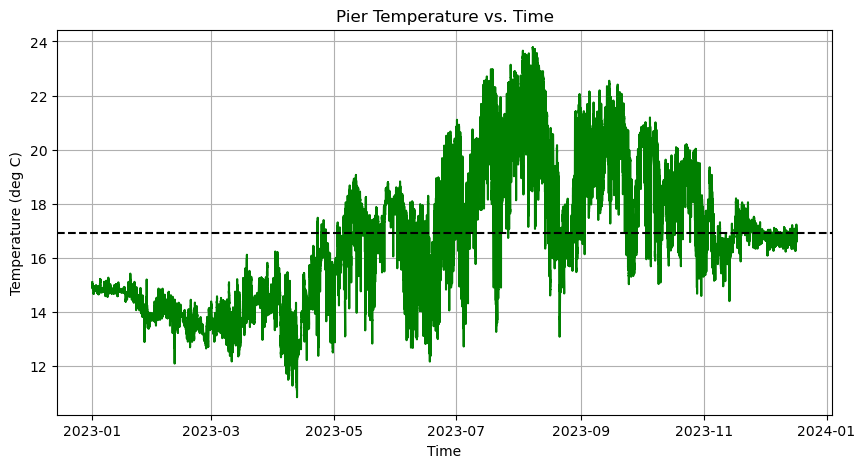

In [ ]:
# Compute mean temperature
mean_temp = temp.mean()

# Create Figure
fig, axes = plt.subplots(figsize=(10,5))

# Plot temperature
axes.plot(time, temp, linestyle='-', linewidth=1.5, color='green')

# Add horizontal line for the mean temperature
axes.axhline(mean_temp, linestyle='--', color='k')

# Make some adjustments
axes.set_title('Pier Temperature vs. Time')
axes.set_xlabel('Time')
axes.set_ylabel('Temperature (deg C)')
axes.grid(True)

# Display figure
plt.show()

Now we need a legend to label these two lines. This requires two steps:

* Labeling the two lines by using the ``label`` argument in the ``axes.plot`` function.
* Telling Python to create the legend.

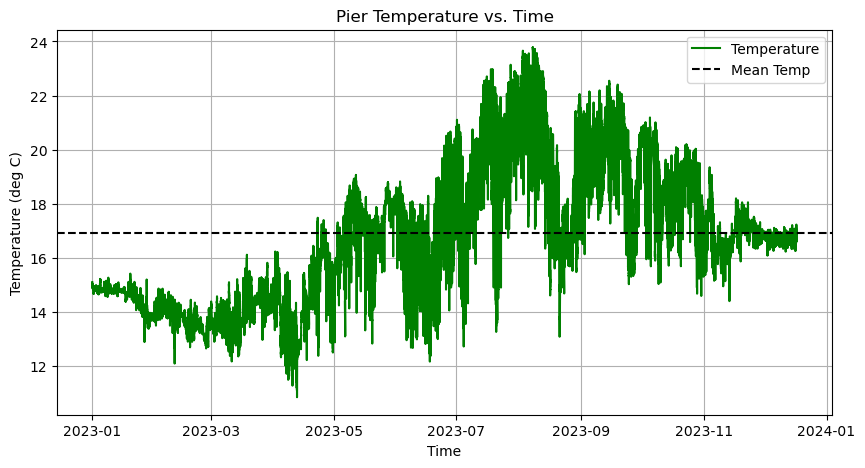

In [ ]:
# Create Figure
fig, axes = plt.subplots(figsize=(10,5))

# Plot temperature
axes.plot(time, temp, linestyle='-', linewidth=1.5, color='green', label = 'Temperature')

# Add horizontal line for the mean temperature
axes.axhline(mean_temp, linestyle='--', color='k', label = 'Mean Temp')

# Make some adjustments
axes.set_title('Pier Temperature vs. Time')
axes.set_xlabel('Time')
axes.set_ylabel('Temperature (deg C)')
axes.grid(True)

# Add legend
axes.legend()

# Display figure
plt.show()

## **Scatter Plots**

Say now that we want to plot a temperature vs. salinity diagram. To do this, we use the scatter plot function:

```
axes.scatter(x, y)
```

* x is your horizontal data (e.g., temperature).
* y is your vertical data (e.g., salinity).

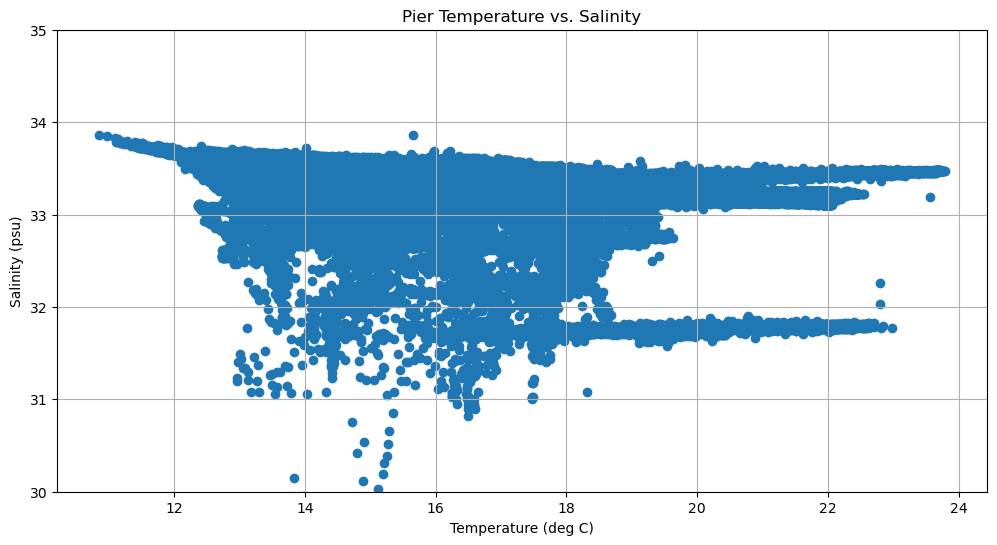

In [ ]:
# Create Figure
fig, axes = plt.subplots(1, 1, figsize=(12,6))

# Plot temperature
axes.scatter(temp, sal)

# Make some adjustments
axes.set_title('Pier Temperature vs. Salinity')
axes.set_xlabel('Temperature (deg C)')
axes.set_ylabel('Salinity (psu)')
axes.set_ylim(30,35)
axes.grid(True)

# Display figure
plt.show()

We can change the shape, point size, color, and transparency of the markers.

| Feature         | Parameter     | Example Code                                       | Description                                                                 |
|-----------------|---------------|----------------------------------------------------|-----------------------------------------------------------------------------|
| Marker shape    | `marker`      | `axes.scatter(x, y, marker='^')`                   | Shape of the marker (e.g., `'.'` for point, `'o'` for circle, `'^'` for triangle-up, `'s'` for square) |
| Marker size     | `s`           | `axes.scatter(x, y, s=50)`                         | Size of the marker in points (area, not diameter)                         |
| Marker color    | `color` or `c`| `axes.scatter(x, y, color='blue')`                 | Color of the marker; use `color` for uniform, or `c` with array for colormap |
| Transparency    | `alpha`       | `axes.scatter(x, y, alpha=0.5)`                    | Opacity of markers; 0 = fully transparent, 1 = fully opaque                |

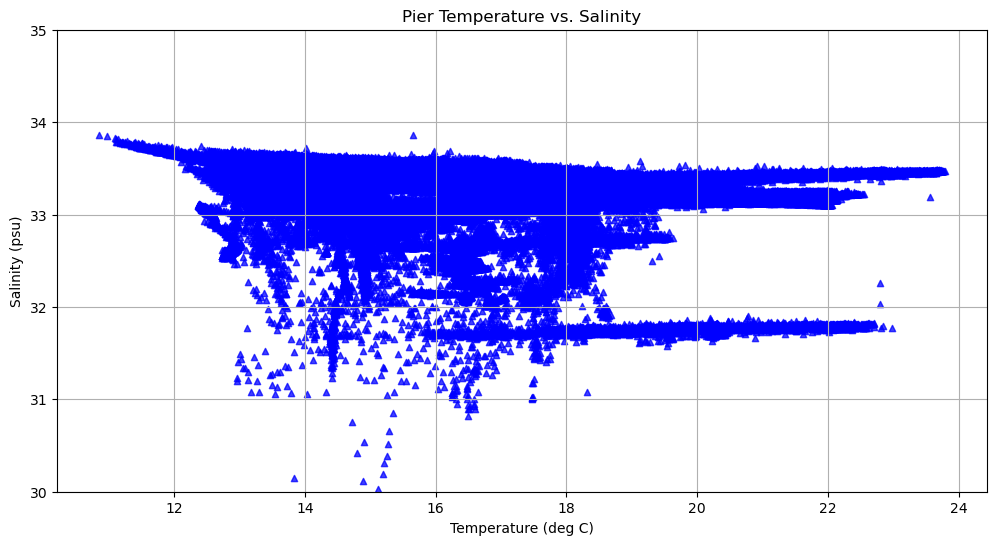

In [ ]:
# Create Figure
fig, axes = plt.subplots(1, 1, figsize=(12,6))

# Plot temperature
axes.scatter(temp, sal, s = 20, marker = '^', color = 'blue', alpha = 0.75)

# Make some adjustments
axes.set_title('Pier Temperature vs. Salinity')
axes.set_xlabel('Temperature (deg C)')
axes.set_ylabel('Salinity (psu)')
axes.set_ylim(30,35)
axes.grid(True)

# Display figure
plt.show()

## **Plotting Uncertainty: Fill between and errorbars**

What if we want to plot the uncertainty of your data? How do you do this in python?

We can plot uncertainty using two types of functions:

* ``axes.fill_between(x, y1, y2)``: Fills the area between two curves or between a curve and a baseline.
    - ``x`` is the shared x-axis data.
    - ``y1`` is the lower boundary of the filled area.
    - ``y2`` (optional) is the upper boundary. If omitted, the area is filled between y1 and y=0.
* ``axes.errorbar(x, y, yerr=errors)``: Adds error bars to a line or point plot.
    - ``x`` is the shared x-axis data.
    - ``yerr`` is the vertical error (can be a scalar or 1D array).

To illustrate this, let's grab the monthly mean temperatures along with the standard error of the mean from the netcdf file

In [ ]:
# Time
time_monthly = num2date(ds.variables['time_m'][:], ds.variables['time_m'].units, only_use_cftime_datetimes=False)

# Monthly mean
temp_monthly = ds.variables['temp_m'][:]

# Monthly standard error of the mean
temp_stdm_monthly = ds.variables['temp_stdm'][:]

And now let's implement the ``axes.fill_between`` function!

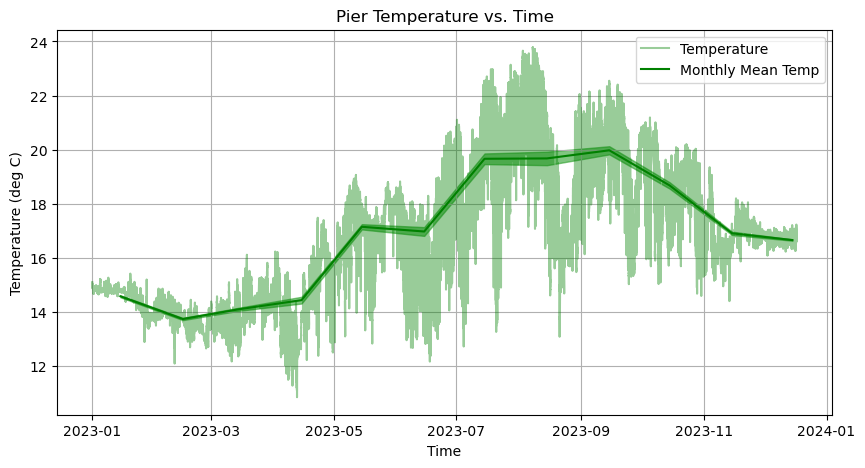

In [ ]:
# Create Figure
fig, axes = plt.subplots(figsize=(10,5))

# Plot temperature
axes.plot(time, temp, linestyle='-', linewidth=1.5, color='green', label = 'Temperature', alpha = 0.4)

# Plot temperature monthly means
axes.plot(time_monthly, temp_monthly, linestyle='-', linewidth=1.5, color='green', label = 'Monthly Mean Temp')

# Plot the standard error of the mean
axes.fill_between(time_monthly, temp_monthly + temp_stdm_monthly, temp_monthly - temp_stdm_monthly, color='tab:green', alpha=0.6)

# Make some adjustments
axes.set_title('Pier Temperature vs. Time')
axes.set_xlabel('Time')
axes.set_ylabel('Temperature (deg C)')
axes.grid(True)

# Add legend
axes.legend()

### 🌊  **Activity** 🌊

<u>*Part 1*</u>

Using the ``axes.errorbar(x, y, yerr=errors)`` function, plot the uncertainty of our data and make the color of the errorbars black.

Hint: If you use the ``axes.errorbar`` function, then you do not need to plot the mean temperature separately using the ``axes.plot function``.

<u>*Part 2*</u>

Add caps to the errorbars using the ``capsize`` argument so that it is easier to see them.

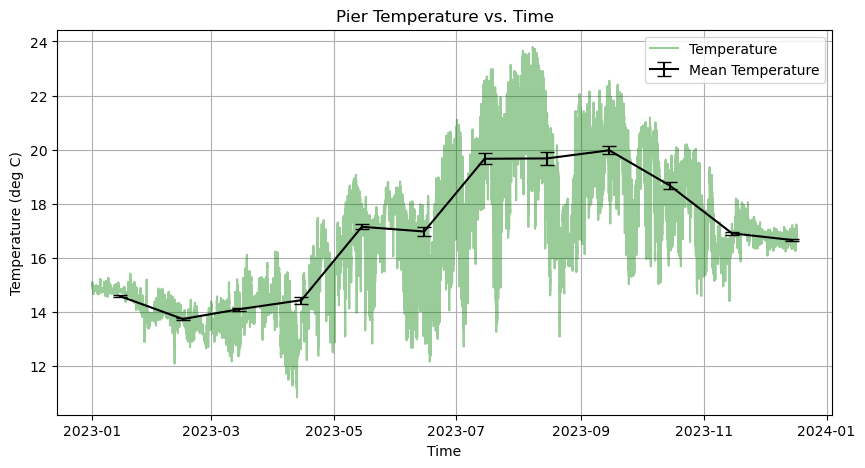

In [ ]:
# Create Figure
fig, axes = plt.subplots(figsize=(10,5))

# Plot temperature
axes.plot(time, temp, linestyle='-', linewidth=1.5, color='green', label = 'Temperature', alpha = 0.4)

# Plot the standard error of the mean
axes.errorbar(time_monthly, temp_monthly, yerr=temp_stdm_monthly, color='k', capsize=5, label = 'Mean Temperature')

# Make some adjustments
axes.set_title('Pier Temperature vs. Time')
axes.set_xlabel('Time')
axes.set_ylabel('Temperature (deg C)')
axes.grid(True)

# Add legend
axes.legend()

# Display figure
plt.show()

## **Plotting 2-dimensional data**

To begin, we need to open a new data set from the Spray gliders! Spray gliders are uncrewed underwater vehicles that dive down 1000 meters and collect measurements of the ocean like temperature and chlorophyll. These gliders are deployed off the coast of California and go back and forth along trasect lines shown in the figure below. The data we will be working with is from just a single transect.

<img src="https://github.com/isidora-rojas/SIO175_DataAnalysis/blob/main/figs/Spray_Glider_lines.png?raw=1" width="500">

In [39]:
# Set the filename and path to data
filename = "data/spray_glider_ctd.nc"

# Open a NetCDF file in read mode
ds = Dataset(filename, mode="r")

# Read in data
depth = ds.variables['depth'][:]
time = num2date(ds.variables['time'][:], ds.variables['time'].units, only_use_cftime_datetimes=False)
temp = ds.variables['temperature'][:]
chl = ds.variables['chlorophyll'][:]

The first way we will visualize this data is with the ``axes.pcolormesh`` function. Pcolormesh makes 2D colored plot where each cell (or patch) in a grid is colored according to the value of a variable. Let's do an example to see how this works:

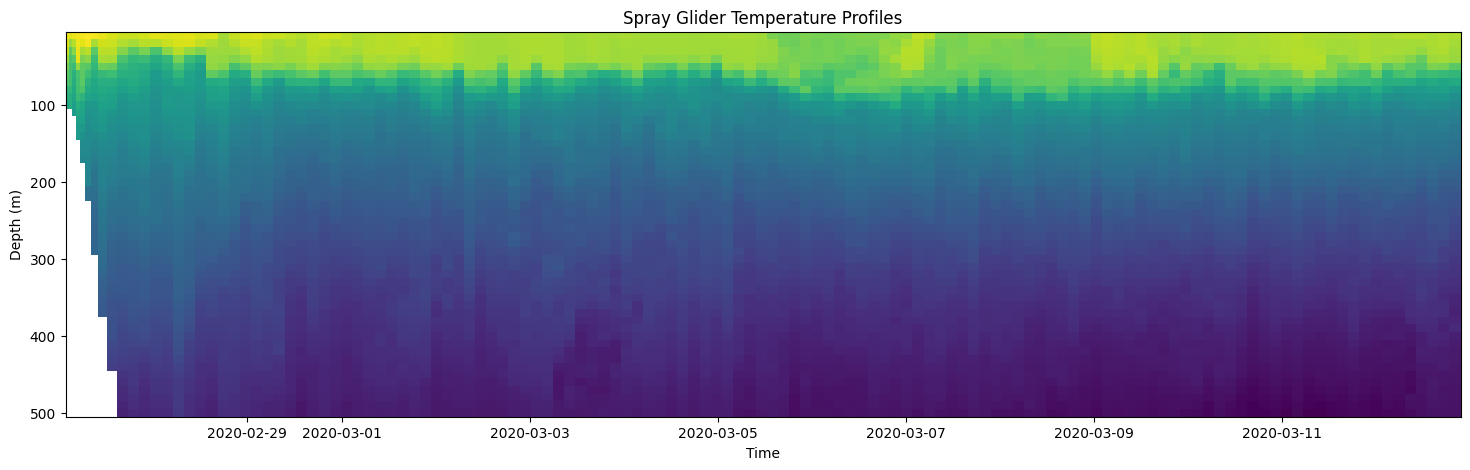

In [40]:
# Create Figure
fig, axes = plt.subplots(figsize=(18,5))

# Plot temperature
axes.pcolormesh(time, depth, temp)

# Make some adjustments
axes.set_title('Spray Glider Temperature Profiles')
axes.set_xlabel('Time')
axes.set_ylabel('Depth (m)')
axes.invert_yaxis()

# Display figure
plt.show()

```axes.pcolormesh(time, depth, temp)```
* ``time``: the horizontal axis coordinate.
* ``depth``: the vertical axis coordinate.
* ``temp``: the 2-dimensional array of values to color-code.

I used the ``axes.invert_yaxis()`` command when I made some adjustments to the axis so that the positive direction of the y-axis points downward for the depth coordinate.

Note the white area on the left hand side of the plot. This area corresponds to a place in our 2D array where there is not temperature data! For this dataset, this happens to be where the water depth gets shallow due to continential shelf.

However there is a problem here -- we don't know what temperatures these colors correspond to. So, we need a colorbar.

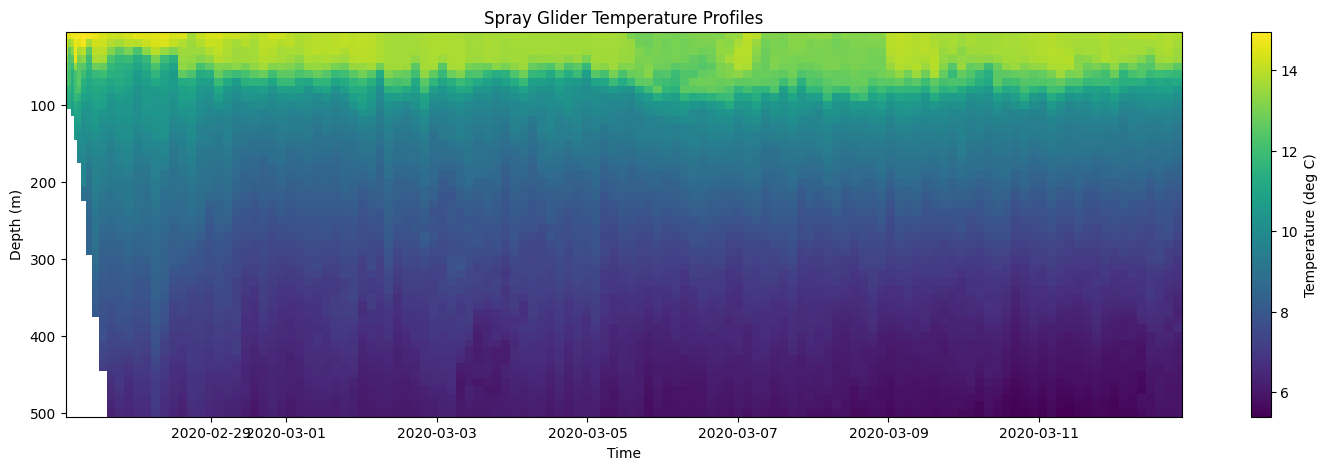

In [41]:
# Create Figure
fig, axes = plt.subplots(figsize=(18, 5))

# Plot temperature and save the mesh object
mesh = axes.pcolormesh(time, depth, temp)

# Add colorbar
plt.colorbar(mesh, ax=axes, label='Temperature (deg C)')

# Make some adjustments
axes.set_title('Spray Glider Temperature Profiles')
axes.set_xlabel('Time')
axes.set_ylabel('Depth (m)')
axes.invert_yaxis()

# Display figure
plt.show()

```plt.colorbar(mesh, ax=axes, label='Temperature (deg C)')```

* ``mesh``: The object that contains the color information.
* ``ax``: The axis the colorbar is associated with.
* ``label``: The label on the colorbar.

Now, it is commonly helpful to change the palette of colors you are using in your colorbar. We call this palette a colormap and there are many to choose from in the matplotlib library. Here are a few:

| Colormap Name | Description                        |
| ------------- | ---------------------------------- |
| `'viridis'`   | Perceptually uniform, good default |
| `'plasma'`    | Bright and high contrast           |
| `'inferno'`   | Dark background, fiery gradient    |
| `'magma'`     | Dark to light grayscale-ish        |
| `'cividis'`   | Colorblind-friendly                |
| `'coolwarm'`  | Blue to red, diverging             |
| `'RdBu_r'`    | Red–blue reversed                  |

You can find more options [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html). To implement the colormap, we use the ``cmap`` argument in the pcolormesh function:

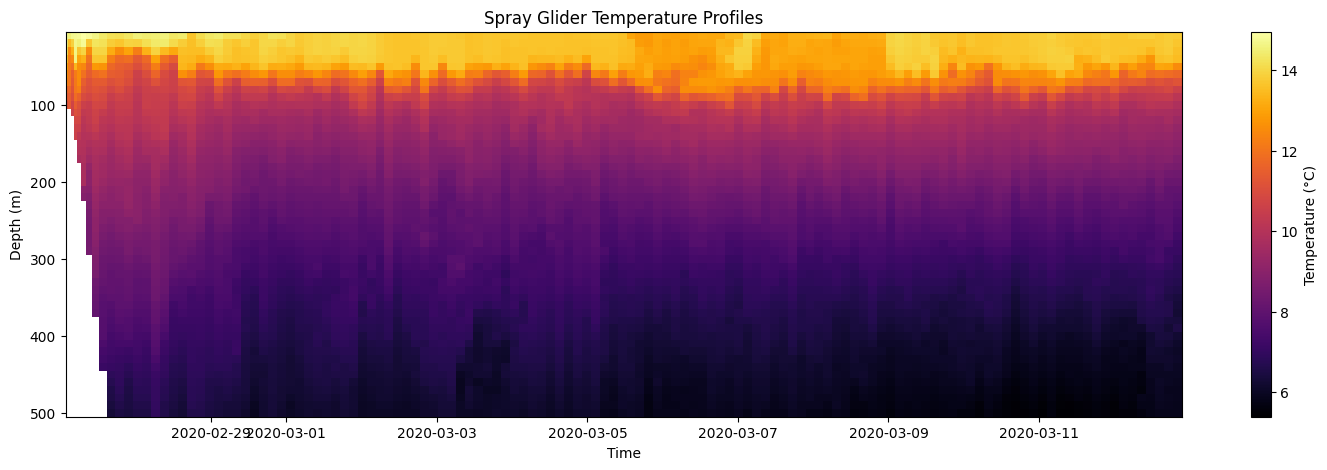

In [42]:
# Create Figure
fig, axes = plt.subplots(figsize=(18, 5))

# Plot temperature with a custom colormap
mesh = axes.pcolormesh(time, depth, temp, cmap='inferno')

# Add colorbar
plt.colorbar(mesh, ax=axes, label='Temperature (°C)')

# Make some adjustments
axes.set_title('Spray Glider Temperature Profiles')
axes.set_xlabel('Time')
axes.set_ylabel('Depth (m)')
axes.invert_yaxis()

# Display figure
plt.show()

A common alternative to the pcolormesh function is ``axes.contourf`` which draws a filled contour plot (similar to a topographic map). Let's show how to use it with the temperature data.

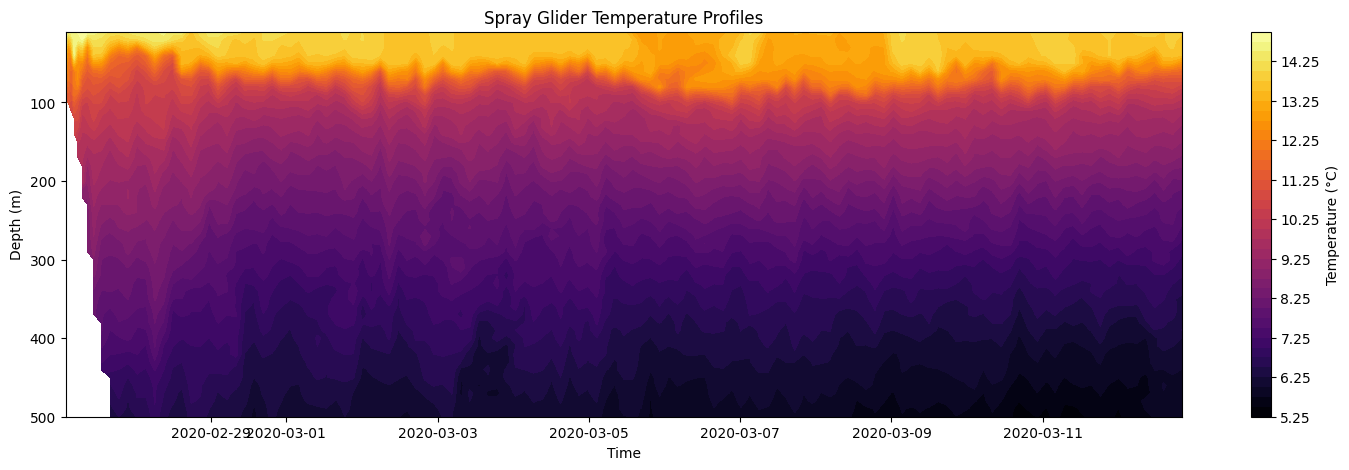

In [43]:
# Create Figure
fig, axes = plt.subplots(figsize=(18, 5))

# Plot temperature with a custom colormap
cf = axes.contourf(time, depth, temp, levels=40, cmap='inferno')

# Add colorbar
plt.colorbar(cf, ax=axes, label='Temperature (°C)')

# Make some adjustments
axes.set_title('Spray Glider Temperature Profiles')
axes.set_xlabel('Time')
axes.set_ylabel('Depth (m)')
axes.invert_yaxis()

# Display figure
plt.show()

The ``axes.contourf`` has many of the same argument, but the critical one you must add is the number of contour levels using the ``levels`` argument. Here, we set this to 40 contour levels.

Next, let's show how to plot data on multiple subplots. We'll use both the temperature and chlorophyll data to illstrate this. Let's break this down into steps:

* ``plt.subplots(2,1,figsize=(18, 5))``: Tell Python to make a figure with 2 rows and 1 column of subplots.
* ``ax1, ax2 = axes[0], axes[1]``: Define each axis by indexing the axes 2D array and naming the axes as ax1 and ax2. These are the variables we will use to plot and adjust our subplots

After this, we will rinse and repeat the same code we used for a plotting the pcolormesh but use ax1 and ax2.

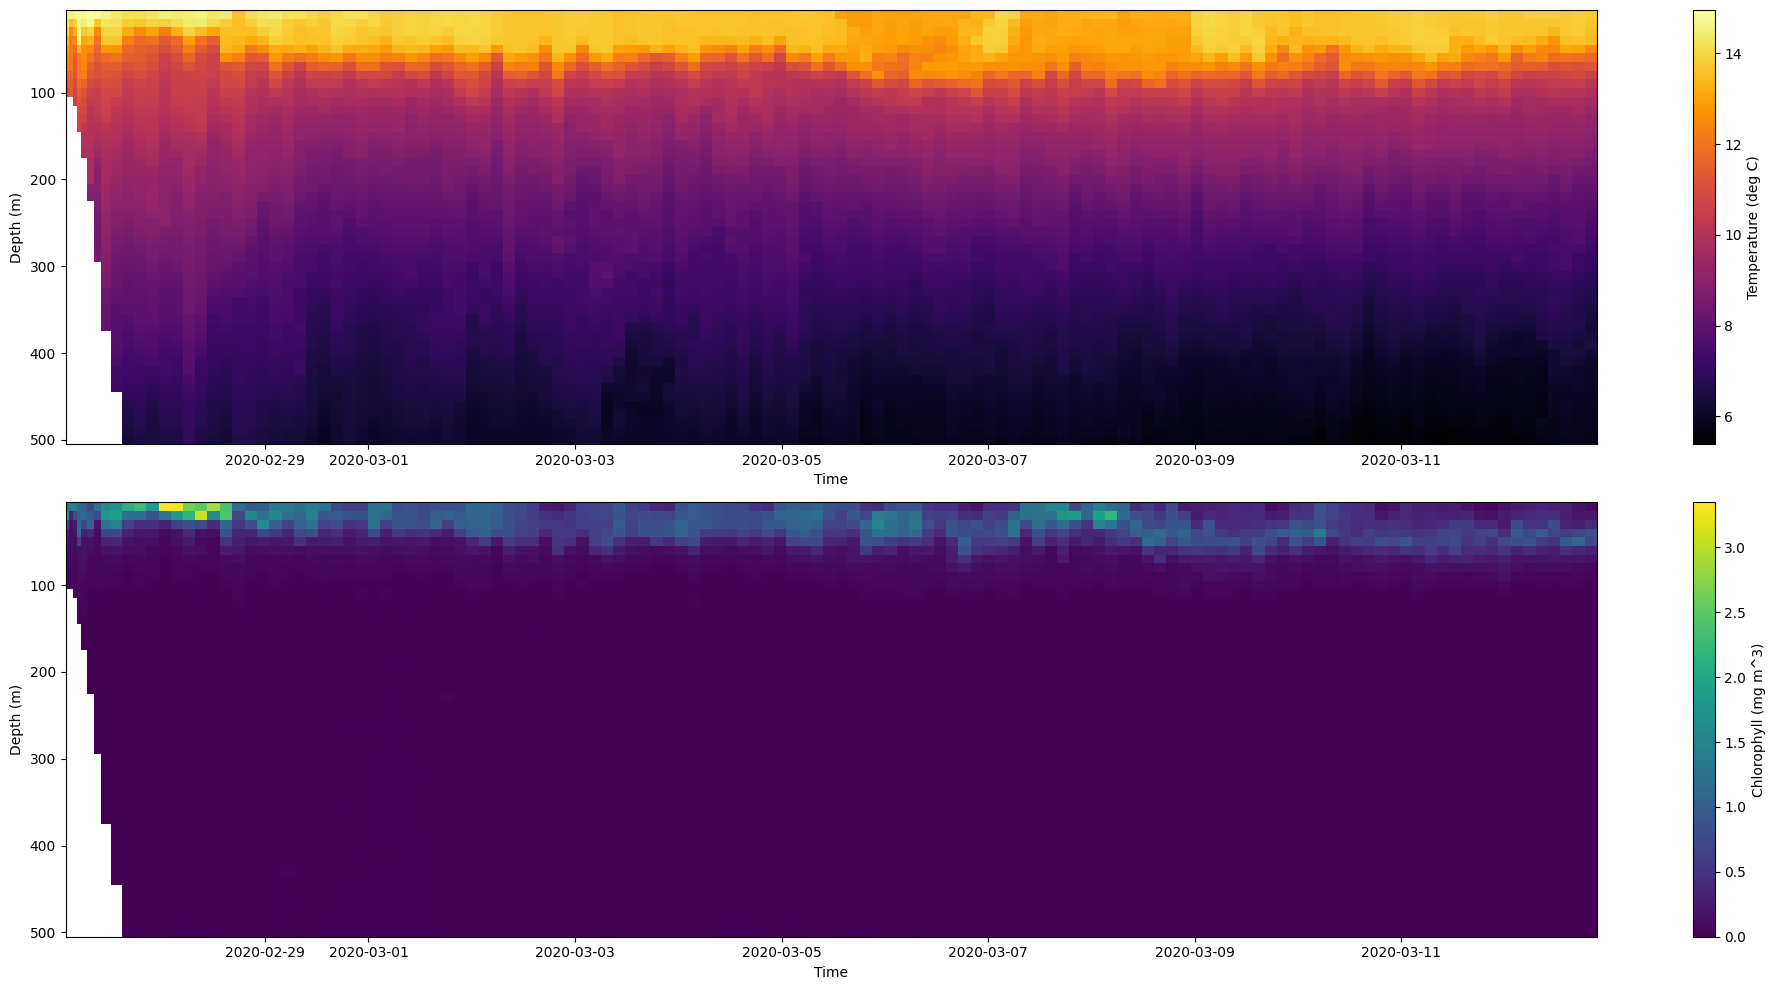

In [44]:
# Create Figure
fig, axes = plt.subplots(2,1,figsize=(20, 10))

# Define axes
ax1, ax2 = axes[0], axes[1]

#--- Subplot 1 ---#

# Plot temperature with a custom colormap
mesh = ax1.pcolormesh(time, depth, temp, cmap='inferno')

# Add colorbar
plt.colorbar(mesh, ax=ax1, label='Temperature (deg C)')

# Make some adjustments
ax1.set_xlabel('Time')
ax1.set_ylabel('Depth (m)')
ax1.invert_yaxis()

#--- Subplot 2 ---#

# Plot chlorophyll with a custom colormap
mesh = ax2.pcolormesh(time, depth, chl, cmap='viridis')

# Add colorbar
plt.colorbar(mesh, ax=ax2, label='Chlorophyll (mg m^3)')

# Make some adjustments
ax2.set_xlabel('Time')
ax2.set_ylabel('Depth (m)')
ax2.invert_yaxis()

# Adjust layout
plt.tight_layout()

# Display figure
plt.show()

Note, I used the ``plt.tight_layout()`` to automatically adjusts the spacing between your plot's elements (like axes, titles, labels) so that nothing overlaps.

Next, we can combine these two subplots using the combination of the ``axes.contourf`` and ``axes.contour`` functions.  ``axes.contour`` is the same function as the contourf function except for that levels are not filled with a color. It is just the contour lines that are plotted.

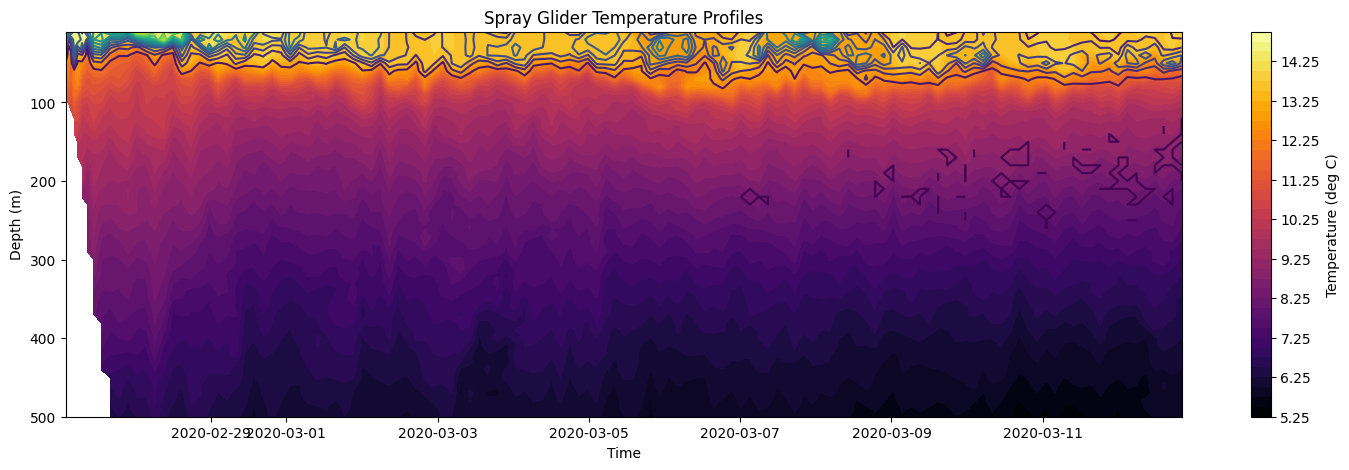

In [45]:
# Create Figure
fig, axes = plt.subplots(figsize=(18, 5))

# Plot temperature
mesh = axes.contourf(time, depth, temp, levels = 40, cmap='inferno')

# Plot chlorophyll on top
cf = axes.contour(time, depth, chl, levels=20)

# Add colorbar
plt.colorbar(mesh, ax=axes, label='Temperature (deg C)')

# Make some adjustments
axes.set_title('Spray Glider Temperature Profiles')
axes.set_xlabel('Time')
axes.set_ylabel('Depth (m)')
axes.invert_yaxis()

# Display figure
plt.show()

Finally, we can save this final figure using ``plt.savefig('filename.png')`` function where `filename.png` is the name of the file. The file will be saved in the current working directory.

In [46]:
fig.savefig('temp_chl_profiles.png')

In this session, we built up core Matplotlib skills step by step—from setting up figures and axes, to creating and customizing line and scatter plots, adding uncertainty visualization, and finally extending to 2-dimensional data with ``pcolormesh`` and ``contourf``.

This is just the tip of the iceberg -- there are many other ways to visualize data. The table below includes both the methods we covered and some we did not.

| Plot Type              | Function Example                                | Description                                      |
|-------------------------|------------------------------------------------|--------------------------------------------------|
| Line Plot              | `axes.plot(x, y)`                               | Basic line plot of `y` vs. `x`.                  |
| Scatter Plot           | `axes.scatter(x, y)`                            | Individual data points shown as markers.         |
| Error Bars             | `axes.errorbar(x, y, yerr=errors)`              | Data with vertical (and optional horizontal) error bars. |
| Fill Between           | `axes.fill_between(x, y1, y2)`                  | Shaded region between curves, often for uncertainty. |
| Histogram              | `axes.hist(data, bins=20)`                      | Frequency distribution of a dataset.             |
| Bar Plot               | `axes.bar(categories, values)`                  | Vertical bar chart.                              |
| 2D Color Mesh          | `pcm = axes.pcolormesh(X, Y, Z)`                | Colored grid for 2D scalar data.                 |
| Contour Plot           | `cs = axes.contour(X, Y, Z, levels=20)`         | Line contours representing 2D scalar data.       |
| Filled Contour Plot    | `cs = axes.contourf(X, Y, Z, levels=20)`        | Filled contour representation of 2D data.        |
| Quiver Plot            | `axes.quiver(X, Y, U, V)`                       | Vector field plot (arrows showing direction and magnitude). |
| Image Display          | `axes.imshow(image)`                            | Display image data (e.g., arrays as images).     |

### 🌊 **Final Activity** 🌊 (10-minutes)

<u>*Part 1*</u>: Plotting 1-dimensional data

- **A Mean Profile**: Using the spray glider’s temperature data, compute the time averaged mean at each depth and plot the mean profile using ``axes.plot()``. Make sure to label axes properly!

- **More Profiles**: Repeat the process for salinity, density, and chlorophyll and make create a 2x2 subplot for each mean profiles and use a different color and marker for each. Hint: you can specify a marker for the data points using the marker argument in the ``axes.plot()`` function.

<u>*Part 2*</u>: Plotting 2-dimensional data

- **More Subplots**: Using the spray glider’s temperature, salinity, density, and chlorophyll data, create a 2x2 subplot figure with this data. Hint: steps would include:
    - Opening salinity and density data with the Dataset library
    - Adjusting ``plt.subplots`` arguments (N,M,figsize).
    - Write code for salinity and density subplots.

- **Orientations for colorbars**: Using the spray glider’s temperature and density data, make a 1x2 subplot and orient the colorbars to be horizontal using the orientation argument in the ``plt.colorbar`` function. Hint: you will probably need to remove the titles.

- **Water depth**: Using the spray glider’s water depth data, plot water depth as a function of time as line plot on top of a pcolormesh plot of temperature. Hint: the absolute value command ``abs()`` may come in handy!

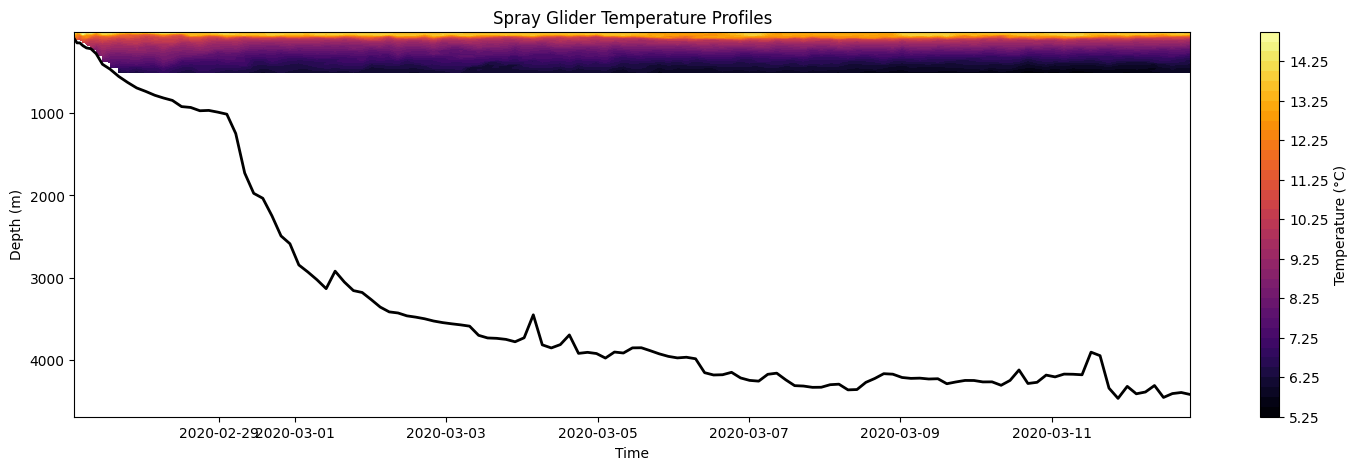

In [47]:
#---------------------------#
#--- Part 2 : Question 3 ---#
#---------------------------#

# Open a NetCDF file in read mode
ds = Dataset(filename, mode="r")

# Read in water depth
water_depth = ds.variables['water_depth'][:]

# Create Figure
fig, axes = plt.subplots(figsize=(18, 5))

# Plot temperature
mesh = axes.contourf(time, depth, temp, levels = 40, cmap='inferno')

# Plot water depth on top
axes.plot(time, abs(water_depth), linestyle='-', linewidth=2, color='k')

# Add colorbar
plt.colorbar(mesh, ax=axes, label='Temperature (°C)')

# Make some adjustments
axes.set_title('Spray Glider Temperature Profiles')
axes.set_xlabel('Time')
axes.set_ylabel('Depth (m)')
#axes.set_ylim(0,500)
axes.invert_yaxis()

# Display figure
plt.show()

## Further Exploration - Multivariate Plots

Keep in mind that you can add more dimensions to the plots above. For example, you could color the dots in the scatter plot according to their density or add inline labels to the chlorophyll contours so that you can see their values overlaid on the 2D temperature data.